# Exploring Breast Cancer Data through Logistic Regression
*Group 7: Rui Xiang Yu, Safa Sajid, Wenhan Zhang, Chuxuan Zhou.*

## 1. Introduction

**Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.**

**Propose one or two questions you want to examine and describe the dataset that will be used to answer the question(s).**

**Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section).**


## Research Proposal: Logistic Regression Analysis of Breast Cell Nuclei for Cancer Diagnosis

Breast cancer is a type of cancer that occurs in the breasts. The cells do not undergo apoptosis as regularly, and keep growing without control. However, cancer can either be benign or malignant depending on the consequences of this uncontrolled cell growth. If the cancer cells destroy other tissues and/or metastasize, it is considered a tumor and malignant. In other cases, the cancer is considered benign (National Cancer Institute, 2021).

The Breast Cancer Wisconsin Dataset was created by Dr. William H. Wolberg, W. Nick Street and Olvi L. Mangasarian. Breast cancer mass was removed from a patient through a fine needle aspirate (FNA), a type of biopsy. Then, the cells' nuclei were visualized and characteristics of each were assessed. This is the information contained in the dataset (Wolberg et al., 1995).

##### Research Question
- **Which cellular nucleus features are most strongly associated with the likelihood of malignancy in breast cancer, as analyzed through logistic regression?** The output variable of interest is the diagnosis, and the input variables are all the other variables that end in 1 (the mean of these variables per observation).

##### Objectives
- Employ logistic regression to quantify the relationship between various cellular features of breast cell nuclei and their malignancy status.
- Determine the predictive accuracy of these features in diagnosing breast cancer, focusing on extending beyond the commonly known indicator of nuclear size.

##### Dataset
The dataset contains 569 observations and 32 variables. 357 of the observations were benign, while 212 of them were malignant. For each cell nucleus, 10 features were measured and the mean was calculated respectively, which are the variables ending in 1. For each variable, its standard error is also included in the dataset (the variables ending in 2) and the largest value is also recorded (the variables ending in 3). For example, "radius1" indicates the mean radius of the cell's nucleus, "radius2" is the standard error of the mean radius, and "radius3" is the largest radius value recorded.

This is the description of each feature:
- `ID`: integers. ID numbers that are associated with each cell's nucleus and used to identify them.
- `diagnosis`: factors. Either "M" which indicates the cell comes from a malignant cancer, or "B" which indicates it comes from a benign cancer. There are 357 benign and 212 malignant.
- `radius1`: doubles. The mean radius of the cell nucleus.
- `texture1`: doubles. The mean standard deviation of the grayscale values of the image. If this value is high, it means that the values differ from each other (some are more black, some are more white) and there is texture.
- `perimeter1`: doubles. The mean perimeter of the cell nucleus.
- `area1`: doubles. The mean area of the cell nucleus.
- `smoothness1`: doubles. The mean variation of the radius length. 
- `compactness1`: doubles. Calculated as perimeter^2/(area - 1), gives an idea of the compactness of the nucleus.
- `concavity1`: doubles. Severity of concave portions of the contour. The bigger this number is, the more severe the concavity is.
- `concave_points1`: doubles. Number of concave portions of the contour.
- `symmetry1`: doubles. Measures how symmetric the nucleus is. It is the difference between the lines that are perpendicular to the cell's longest radius.
- `fractal_dimension1`: doubles. Measures how complex the cell nucleus outline is.

##### Literature Review
1. **National Cancer Institute (2021, October 11). "What is cancer?"**: This source provides a foundational understanding of cancer, crucial for contextualizing the research. [What is Cancer?](https://www.cancer.gov/about-cancer/understanding/what-is-cancer)
2. **Singh, I., & Lele, T. P. (2022). "Nuclear Morphological Abnormalities in Cancer: A Search for Unifying Mechanisms"**: Discusses the importance of nuclear morphology in cancer diagnosis, which is directly relevant to the study. [Nuclear Morphological Abnormalities in Cancer](https://doi.org/10.1007/978-3-031-06573-6_16)

##### Methodology
- **Logistic Regression Analysis**: To model the probability of a cell nucleus being malignant based on its features. Suitable for binary classification problems like cancer diagnosis.
- **Feature Selection**: Employing techniques to identify the most relevant features for the model to reduce dimensionality and potential overfitting.

##### Significance
- The study aims to deepen the understanding of cellular nucleus features in breast cancer diagnosis. Identifying significant predictors of malignancy could lead to more accurate diagnostics, crucial for patient outcomes.


In [32]:
# Installing any necessary libraries.
library(tidyverse)
library(tidymodels)
library(readr)
library(cowplot)
library(RColorBrewer)
library(ggplot2)
library(GGally)
library(glmnet)
library(glmbb)
library(broom)
library(leaps)
library(faraway)
library(mltools)
library(pROC)
library(caret)

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma



Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [33]:
# Reading the data into R and specifying the column names.
breast <- read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                  col_names = c("ID", "diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1",
                               "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
                               "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2",
                                "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
                               "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3",
                                "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"))

# Previewing the first 6 columns of the loaded dataset.
head(breast)

Rows: 569 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): ID, radius1, texture1, perimeter1, area1, smoothness1, compactness...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,⋯,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


*Figure 1. First 6 rows of the complete Breast Cancer data set.*

In [34]:
# Looking at how many missing values are in each variable:
colSums(is.na(breast))

ID          diagnosis            radius1           texture1 
                 0                  0                  0                  0 
        perimeter1              area1        smoothness1       compactness1 
                 0                  0                  0                  0 
        concavity1    concave_points1          symmetry1 fractal_dimension1 
                 0                  0                  0                  0 
           radius2           texture2         perimeter2              area2 
                 0                  0                  0                  0 
       smoothness2       compactness2         concavity2    concave_points2 
                 0                  0                  0                  0 
         symmetry2 fractal_dimension2            radius3           texture3 
                 0                  0                  0                  0 
        perimeter3              area3        smoothness3       compactness3 
                 0                  0                  0                  0 
        concavity3    concave_points3          symmetry3 fractal_dimension3 
                 0                  0                  0                  0

In [35]:
# Looking at total number of observations.
cat("Number of Observations: ", nrow(breast))

Number of Observations:  569

In [36]:
# Obtaining the total number of observations per diagnosis.
diagnosis_count <- breast %>%
    group_by(diagnosis) %>%
    summarise(count = n())
diagnosis_count

diagnosis,count
<chr>,<int>
B,357
M,212


*Figure 2. Number of observations per diagnosis type.*

## 2. Exploratory Data Analysis

### 2.1. Data tidying

The data has already been read above. The data has to be tidied to include only the necessary columns.

**Demonstrate that the dataset can be read from the web into R.
Clean and wrangle your data into a tidy format.**

In [37]:
# Selecting the columns of interest, mutating "diagnosis" as a factor and changing its name.
breast_clean <- breast %>%
select(diagnosis, radius1, texture1, perimeter1, area1, smoothness1, compactness1,
       concavity1, concave_points1, symmetry1, fractal_dimension1) %>%
mutate(diagnosis = as_factor(diagnosis)) %>%
mutate(diagnosis = recode_factor(diagnosis, `M` = "Malignant",
                                 `B` = "Benign" ))

# Changing column names.
colnames(breast_clean) <- c("diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area",
                           "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points",
                           "mean_symmetry", "mean_fractaldimension")

# Previewing first six rows of the cleaned dataset.
head(breast_clean)

diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractaldimension
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
Malignant,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


*Figure 3. First 6 rows of the tidied Breast Cancer dataset.*

### 2.2. Data exploration
When performing logistic regression, there are a few assumptions that one has to be aware of:
- Independence of data points: due to the study's design, we expect data points to be independent. Patients were picked in a non-biased manner and each observation is a single nucleus analysis (none of the observations depend on each other).
- Sample size: for each independent variable, there should be 10 observations with the least frequent outcome. 
- Linearity: there should be a linear relationship between the input variables and the log odds of the dependent variable.
- Multicollinearity: it is important that no input variables are highly correlated with each other.

We can take a look at the input variables that are most correlated. For our purposes, being highly correlated means having a correlation equal to or bigger than 0.7.


**Plot the relevant raw data, tailoring your plot in a way that addresses your question.
make sure to explore the association of the explanatory variables with the response.
your Exploratory Data Analysis (EDA) must be comprehensive with high quality plots.
Any summary tables that is relevant to your analysis.
Be sure to not print output that takes up a lot of screen space.**

In [38]:
# Creating a correlation tibble.
corr_matrix_breast <- breast_clean %>%
   select(- diagnosis) %>% 
   cor() %>%
   as.data.frame() %>%
   rownames_to_column("var1") %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr") %>%
   filter(corr >= 0.7) %>%
   arrange(desc(corr)) %>%
   tail(20) # Show only the tail as the first 10 values are just each value's correlation with itself.

# Take out the odd rows as they are duplicates of the even rows.
row_odd <- seq_len(nrow(corr_matrix_breast)) %% 2  
corr_breast <- corr_matrix_breast[row_odd == 1, ]
corr_breast

var1,var2,corr
<chr>,<chr>,<dbl>
mean_radius,mean_perimeter,0.9978553
mean_radius,mean_area,0.9873572
mean_perimeter,mean_area,0.9865068
mean_concavity,mean_concave_points,0.9213910
mean_compactness,mean_concavity,0.8831207
mean_perimeter,mean_concave_points,0.8509770
mean_compactness,mean_concave_points,0.8311350
mean_area,mean_concave_points,0.8232689
mean_radius,mean_concave_points,0.8225285


*Figure 4. Highest correlated input variables in the Breast dataset.*

There are a lot of variables that are highly correlated among themselves. Thus, to solve multicollinearity, we expect for some of these variables to be dropped during model selection.
- Radius, area, and perimeter are correlated with each other. We could drop 2 of these and keep one, for example, radius.
- Concave points is the variable that is correlated with the highest number of variables. Thus, we expect to drop this variable.
- Compactness and concavity are highly correlated. We could drop compactness and keep concavity.

Note: these are possible variables to drop. However, which variables to keep and which ones to discard will be determined through model selection.

### 2.3. Data visualization

In order to not create an overwhelming plot, we will look at 5 variables that might be associated with the diagnosis in order to see the data distribution and estimate the possible values to be dropped.

According to Singh & Lele (2022), nucleus' size and shape are associated with cancerous cells. For size, we will look at radius. For shape, we will look at fractal dimension, symmetry, concavity, and smoothness. The color palette selected is colorblind-friendly.

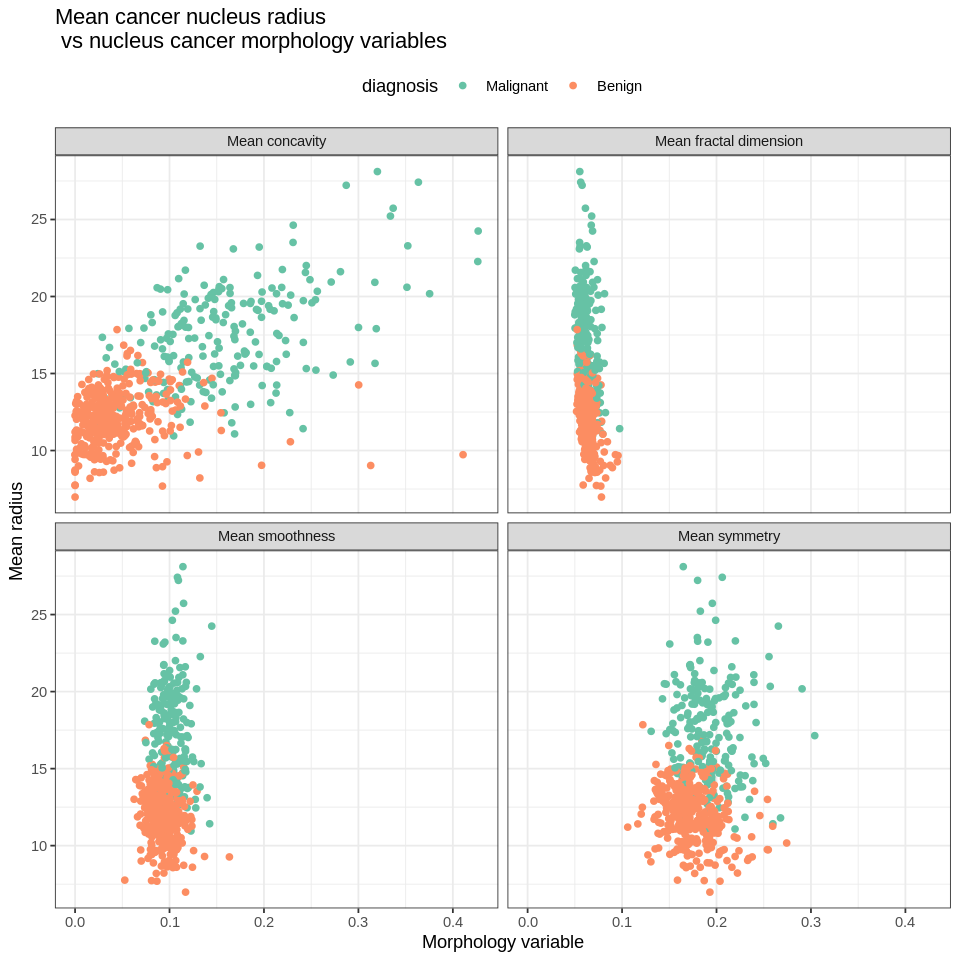

In [39]:
# For visualizing the dimensions of the plots.
options(repr.plot.width = 8, repr.plot.height = 8)

# Setting a theme.
theme_set(
  theme_bw() +
    theme(legend.position = "top")
  )

# Setting up a tibble to create a combo plot.
breast_gathered <- breast_clean %>%
select(diagnosis, mean_radius, mean_symmetry, mean_concavity, mean_smoothness, mean_fractaldimension) %>%
  as_tibble() %>%
  gather(key = "variable", value = "value",
         -mean_radius, -diagnosis)

# Creating the labels for the x variables.
x.labs <- c("Mean concavity", "Mean fractal dimension", "Mean smoothness", "Mean symmetry")
names(x.labs) <- c("mean_concavity", "mean_fractaldimension", "mean_smoothness", "mean_symmetry")

# Creating the combo plot.
breast_vis <- ggplot(breast_gathered, aes(x = value, y = mean_radius)) +
  geom_point(aes(color = diagnosis)) +
  facet_wrap(~variable,
            labeller = labeller(variable = x.labs))+
  ggtitle("Mean cancer nucleus radius\n vs nucleus cancer morphology variables")+
  ylab("Mean radius")+
  xlab("Morphology variable")+
  scale_color_brewer(palette = "Set2")

breast_vis

*Figure 5. Scatterplot of nuclear mean radius vs nuclear morphology variables.*

As shown, there seems to be a linear relationship between the nuclear mean radius and the rest of the morphological variables. There are quite a few outliers, especially in the first plot (radius vs concavity). However, most of the data seems to be concentrated in the same area.

A few more interpretations can be extrapolated from the graph:
- There are two clear clusters in each graph that are mostly separated which correspond to the diagnosis of whether they are malignant or benign. Thus, it is likely these variables are associated with diagnosis.
- Malignant cells' nuclei tend to have bigger radius than benign cells.
- From these plots, it seems like benign and malignant cells do not differ extremely in fractal dimension and smoothness. However, the symmetry is a bit more spread out but it seems like most values lie around the same value.

Thus, it is possible that fractal dimension, smoothness, and symmetry are variables that might get dropped from the model. However, as mentioned, whether a model gets dropped or not depends on the model selection process and the goodness of the model.

## 3. Methods

The data will be analysed in the following way:

1. Split the dataset in half: a selection/training set and an inference/testing set.
2. For both inference and prediction: on the selection/training set, perform LASSO model selection for logistic regression with 10-fold cross-validation to determine the best predictors for diagnosis. Evaluate multicollinearity of the model through vif().
3. For inference: on the inference/testing set, perform logistic regression with the variables selected by LASSO. Perform hypothesis testing and confidence interval obtention through tidy().
4. For prediction: on the inference/testing set, perform logistic regression with the variables AND coefficients selected by LASSO. Evaluate the prediction performance with a confusion matrix and a ROC curve (look at AUC too).

This method is appropriate because the response variable is a categorical variable and thus, logistic regression can be used to predict the probability of the diagnosis being either malignant or benign. Linear regression cannot be performed. Furthermore, LASSO for model selection is appropriate as it will consider the contribution of all variables (as opposed to partial algorithms where only the partial contribution is considered).

Important assumptions for logistic regression are multicollinearity, sample size, and linearity. Input variables should not be highly correlated with each other. Moreover, usually 10 observations per input variable are required for logistic regression. Lastly, there should be a linear relationship between the input variables and the log odds of the dependent variable.

In regards to multicollinearity, LASSO selection will reduce that and we will also check through vif(). However, sample size might be a limitation. Since we do not know yet which will be our predictor variables (these will be determined through model selection), we cannot determine if our sample size is big enough yet. However, since our sample size is quite large (569 observations), we expect that sample size is not a limitation in this project

As for linearity, since the model has not been coded for yet, there is no way of telling if the assumption holds yet. However, based on the plots generated above, it seems like there is a linear relationship for all variables.

Further limitations include the fact that logistic regression is prone to overfitting in multidimensional data, such as ours. It is also sensitive to outliers and this might affect the accuracy of the coded model.

**Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code that does the analysis.
If included, describe the “Feature Selection” process, how and why you choose the covariates of your final model.
Make sure to interpret/explain the results you obtain. It’s not enough to just say “I fitted a linear model with these covariates, and my R-square is 0.87”.
if inference is the aim of your project, detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities (e.g., are the coefficients significant? how is the model fitting the data)?
a careful model assessment must be conducted.
if prediction is the aim of the project, describe the test data used or how it was created.
Ensure your tables and/or figures are labeled with a figure/table number.**

### 3.1. Implementation of a proposed model

#### Model Selection:

In [40]:
#Note: only steps 2, 3, and 4 were implemented.

# Setting a seed for reproducibility.
set.seed(2023)

# Mutating diagnosis to "0" or "1". 1 is malignant, and 0 is benign.
breast_logistic <- 
     breast_clean %>% 
     mutate(diagnosis = ifelse(diagnosis == "Malignant", 1, 0))

# Splitting the data into a model selection and an inference set.
breast_split <- initial_split(breast_logistic, prop = 0.6, strata = diagnosis)
breast_selection <- training(breast_split)
breast_inference <- testing(breast_split)

# Model selection:

# Preparing the X and Y:
X_selection <-  model.matrix(diagnosis ~  ., data=breast_selection)[,-1]
Y_selection <- breast_selection[,"diagnosis"]=="1"

# Performing LASSO cross validation to find lambda.min:
breast.model <- 
   cv.glmnet(
   x = X_selection, y = Y_selection,
   alpha = 1,
   family = "binomial",
   type.measure = "auc",
   nfolds = 10)

lambda.min <- breast.model$lambda.min

# Finding the covariates in lambda.min:
lassobreastmodel <- glmnet(
   x = X_selection, y = Y_selection,
   alpha = 1,
   family = "binomial",
   lambda = lambda.min
 )

# Obtaining the list of covariates:
beta_lasso <- coef(lassobreastmodel, s = "lambda.min")

lasso_selected_covariates <- as_tibble(
         as.matrix(beta_lasso),
         rownames='covariate') %>%
         filter(covariate != '(Intercept)' & abs(s1) !=0)%>% 
         pull(covariate)

lasso_selected_covariates

[1] "mean_radius"           "mean_texture"          "mean_smoothness"      
[4] "mean_concave_points"   "mean_fractaldimension"

#### Inference:

In [41]:
# Setting a seed for reproducibility.
set.seed(301)

# Inference:

# Fitting a logistic regression model with the variables selected by LASSO:
breast_log <- 
   glm(
        formula = diagnosis ~ mean_radius + mean_texture + mean_smoothness +
       mean_concave_points + mean_fractaldimension,
        data = breast_inference,
        family = binomial)

breast_log_expresults <- tidy(breast_log, exponentiate = TRUE, conf.int = TRUE) %>%
mutate_if(is.numeric, round, 3)

breast_log_expresults

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.000000e+00,8.724,-2.935,0.003,0.000,0.000000e+00
mean_radius,2.657000e+00,0.309,3.160,0.002,1.516,5.180000e+00
mean_texture,1.300000e+00,0.075,3.504,0.000,1.132,1.525000e+00
mean_smoothness,6.009287e+06,39.508,0.395,0.693,0.000,1.223210e+40
mean_concave_points,2.088791e+28,28.308,2.304,0.021,312233.872,2.207167e+54
mean_fractaldimension,4.697083e+09,77.027,0.289,0.772,0.000,1.215104e+76


*Figure 6. Exponentiated estimates from the Logistic Regression.*

- At a significance level of 5%, we do not have enough evidence to reject the null hypothesis that the mean smoothness and the mean fractal dimension are variables that are significantly associated with the odds of a diagnosis being malignant (p> 0.05).
- At a significance level of 5%, a 1 point increase in the mean radius is associated with the increase of the odds of a diagnosis to be malignant by a factor of 2.657, while keeping the rest of the input variables constant.
- At a significance level of 5%, a 1 point increase in the mean texture is associated with a 30% increase in the odds of a diagnosis to be malignant, while keeping the rest of the input variables constant.
- At a significance level of 5%, a 1 point increase in the mean concave points is associated with the increase of the odds of a diagnosis to be malignant by a factor of 2.088x10(^28), while keeping the rest of the input variables constant.

#### Prediction:

In [52]:
# Setting a seed for reproducibility.
set.seed(1234)


# create new model matrix for prediction
model_matrix_X_test <- 
    model.matrix(object = diagnosis ~ .,
                 data = breast_inference)[, -1]

# predict diagnosis on the test (inference) set using lasso model
breast_predictions <- 
  round(predict(lassobreastmodel, newx = model_matrix_X_test, type = "response"), 0)


# obtain a confusion matrix for evaluation
breast_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(breast_predictions),
    reference = as.factor(breast_inference$diagnosis),
    positive = "1"
)

breast_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 137  11
         1   6  74
                                         
               Accuracy : 0.9254         
                 95% CI : (0.8833, 0.956)
    No Information Rate : 0.6272         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8386         
                                         
 Mcnemar's Test P-Value : 0.332          
                                         
            Sensitivity : 0.8706         
            Specificity : 0.9580         
         Pos Pred Value : 0.9250         
         Neg Pred Value : 0.9257         
             Prevalence : 0.3728         
         Detection Rate : 0.3246         
   Detection Prevalence : 0.3509         
      Balanced Accuracy : 0.9143         
                                         
       'Positive' Class : 1              
                                         

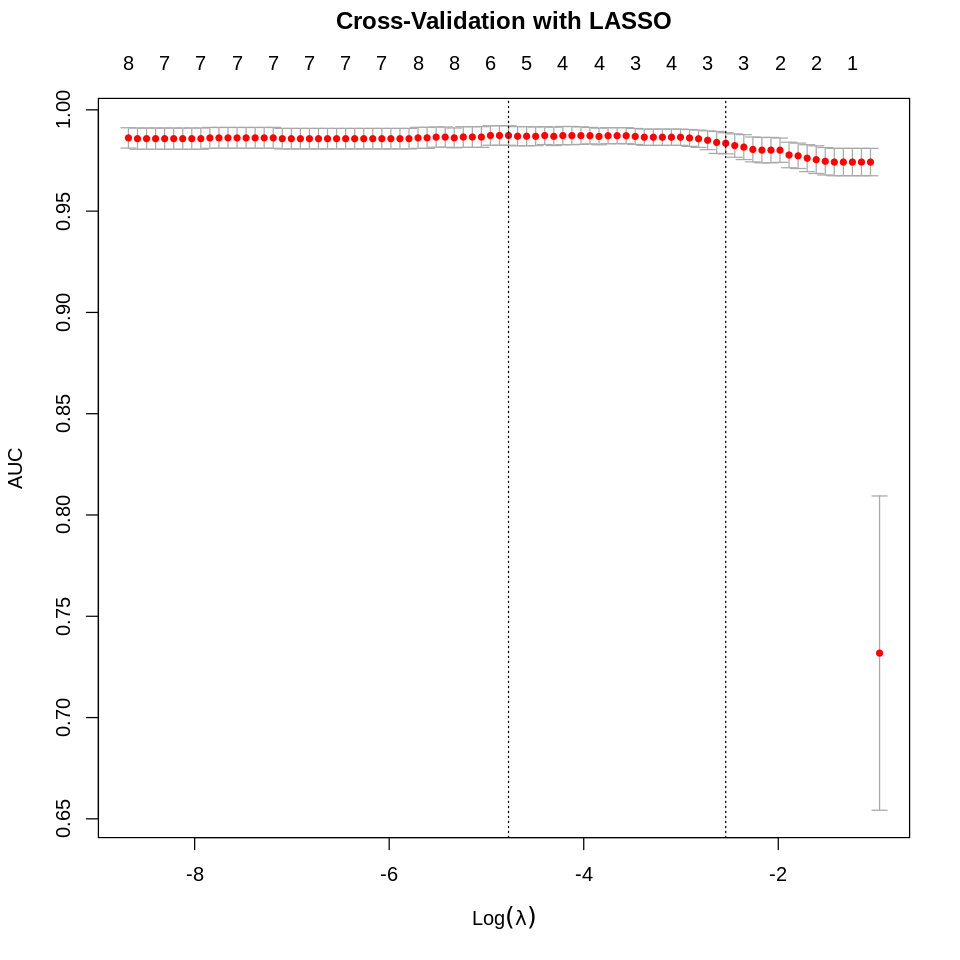

In [60]:
#plot AUC values for lasso cross-validation
plot(breast.model, main = "Cross-Validation with LASSO\n\n")

*Figure 7. Plot of the AUC values from lambda cross-validation*

In [61]:
# obtain AUC value for minimum lambda
lasso_auc <- breast.model$cvm[breast.model$index][2]
lasso_auc

[1] 0.9835004

Setting levels: control = 0, case = 1

Setting direction: controls < cases



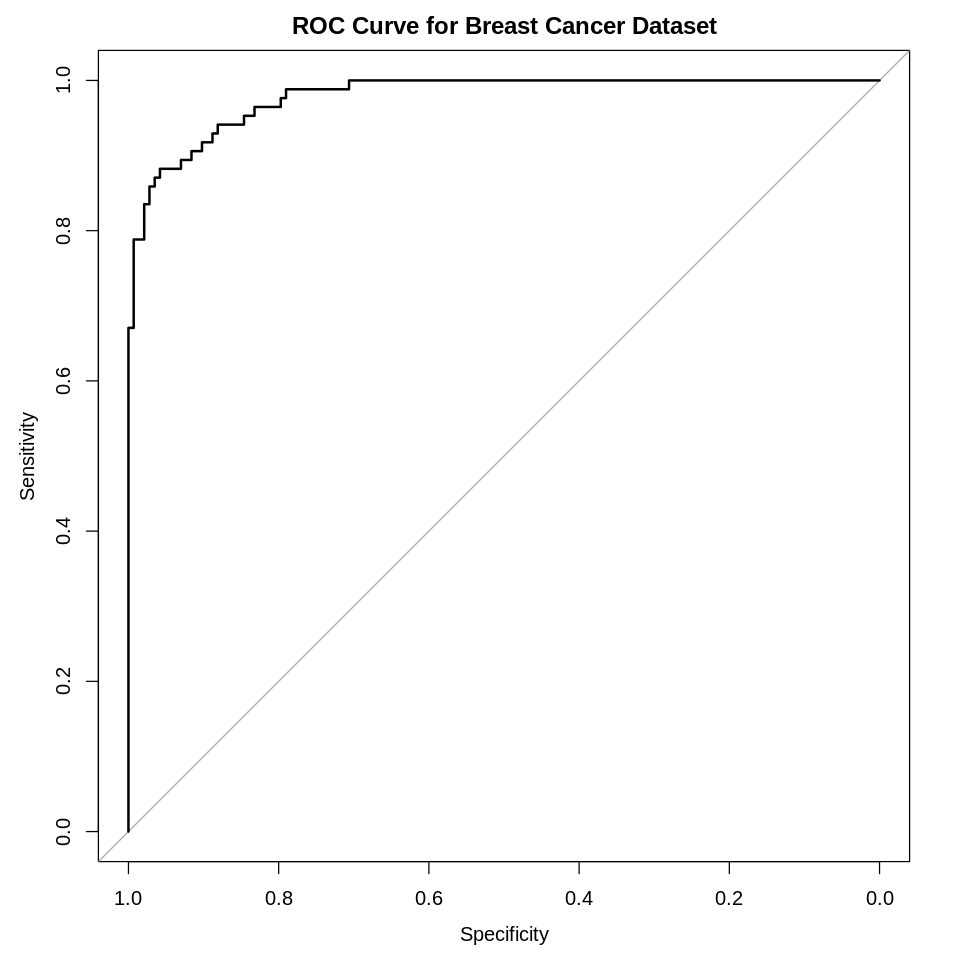

In [62]:
# plot ROC curve
ROC_lasso <- 
    roc(
        response = breast_inference$diagnosis,
        predictor = predict(lassobreastmodel,
                     newx = model_matrix_X_test)[,"s0"]) 

plot(ROC_lasso, main = "ROC Curve for Breast Cancer Dataset")

*Figure 8. Plot of the ROC Curve of the lasso model in the test data*

### Insights from the Prediction Model
Our predictive model, focused on identifying the likelihood of breast cancer malignancy, has yielded key insights. The significant predictors – mean radius, mean texture, and mean concave points – have been instrumental in understanding the factors influencing malignancy. However, it's crucial to delve deeper into the implications and potential applications of these findings.

### Potential for Clinical Application
The practical application of our model in clinical settings warrants discussion. Its potential in aiding early detection and enhancing diagnostic processes can be a significant step forward in breast cancer treatment and management.

### Considerations for Future Improvements
There are several areas where our model could be improved:
- Integrating a more diverse dataset to enhance the model's generalizability.
- Exploring advanced machine learning algorithms that could provide more nuanced predictions.
- Continuous updating of the model with new data to maintain its relevance and accuracy.

### Future Research Opportunities
This project opens up numerous avenues for future research, including:
- Application of the model to other types of cancer to test its versatility.
- Incorporation of genetic and lifestyle factors to create a more comprehensive predictive model.
- Collaborations with healthcare providers for real-world testing and feedback.

### Conclusion
Our predictive analysis is a stepping stone in the use of data science in healthcare. By continuously refining and testing our model, we can contribute significantly to the field of medical research, particularly in understanding and managing breast cancer.

## 4. Discussion

### Inference from Logistic Regression and LASSO Analysis on Breast Cancer Diagnosis

#### Significant Predictors Identified
- **Logistic regression and LASSO selection** identified **mean radius**, **mean texture**, and **mean concave points** as significant predictors for malignancy in breast cancer.

#### Influence of Individual Features
- **Mean Radius**: A one-unit increase in mean radius is associated with an approximately **2.657 times** increase in the odds of malignancy.
- **Mean Texture**: A one-unit increase in mean texture results in a **30% increase** in the odds of malignancy.
- **Mean Concave Points**: The odds of malignancy increase significantly with an increase in mean concave points, although the exact factor (2.088x10^28) might require further validation.

#### Limitations and Considerations
- **Smoothness and Fractal Dimension**: These features did not show a statistically significant association with malignancy at a 5% significance level.
- **Multicollinearity and Model Fit**: Addressed through VIF and AUC analysis, ensuring reliable predictors and model performance.
- **Sample Size**: The large sample size (569 observations) likely mitigates the risk of sample size limitations.

#### Future Research Directions
- Investigate the practical implications of the high odds ratio observed for mean concave points.
- Explore non-significant variables in different datasets for broader insights.

In conclusion, the analysis enhances understanding of key cellular nucleus features in breast cancer malignancy, potentially guiding more effective screening methods.

**You’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.**

**Summarize what you found, and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss how your model could be improved;
Discuss future questions/research this study could lead to.**

## 5. Works Cited
National Cancer Institute. (2021, October 11). *What is cancer?* https://www.cancer.gov/about-cancer/understanding/what-is-cancer 

Singh, I., & Lele, T. P. (2022). Nuclear Morphological Abnormalities in Cancer: A Search for Unifying Mechanisms. Results and problems in cell differentiation, 70, 443–467. https://doi.org/10.1007/978-3-031-06573-6_16

Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

**At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.**